# Statistics: The Science of Decisions Project Instructions

## Background Information

Stroop effect is a demonstration of interference in the reaction time of a task.

__Stroop task Detailed Explanation:__
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.
Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.
1. What is our independent variable? 
    What is our dependent variable?
2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
Now it’s your chance to try out the Stroop task for yourself. Go to this link, which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.
3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?
6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!


In [27]:
%matplotlib inline
import csv
from datetime import datetime
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import numpy as np
from scipy import stats
import math

df = pd.read_csv('stroopdata.csv')

print(df.head())
print()
print(f'Shape = {df.shape}')

   Congruent  Incongruent
0     12.079       19.278
1     16.791       18.741
2      9.564       21.214
3      8.630       15.687
4     14.669       22.803

Shape = (24, 2)


## 1. What is our independent variable? What is our dependent variable?


**Answer**:

Independent variable is word condition which is the congruence of the word and its colour. 

Dependent variable is the measurement of time taken for the test.

## 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Now it’s your chance to try out the Stroop task for yourself. Go to this link, which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

**Answer**: 

The current dataset represents a small sample group of a possibly large population of human. Luckily, we do not need data of the whole population to determine that, we have to make do with the small sample set and determine whether there is statistical significance in the two tasks. 

### Null Hypothesis, H<sub>0</sub>

Null hypothesis is that there will not be difference in reading time for Congruent and Inconguent tasks.
$$ H_0 : {μ}_{Congruent} = {μ}_{Incongruent}$$


### Alternative Hypothesis, H<sub>a</sub>
Alternative hypothesis is there will be difference in reading time for Congruent and Inconguent tasks.
$$ H_a : {μ}_{Congruent} < {μ}_{Incongruent}$$

_<body><center>where μ represents the population mean.</center></body>_


__Paired sample T-test__ is chosen as the statistical test. The experiment has a person tested for both of the test (group of units that has been tested twice).

As the sample size is small (n<30), t-test is suitable. In addition, standard deviation of the population is also unknown.


## 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.


In [7]:
print(df.describe())

       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000



**Answer**: 

Some descriptive statistics regarding this dataset:

### Congruent:

|	Descriptive Statistics	|	Value	|
|	-	|	-	|
|	count	|	24	|
|	mean	|	14.051125	|
|	std	|	3.559358	|
|	min	|	8.63	|
|	25%	|	11.89525	|
|	50%	|	14.3565	|
|	75%	|	16.20075	|
|	max	|	22.328	|



### Incongruent:

|	Descriptive Statistics	|	Value	|
|	-	|	-	|
|	count	|	24	|
|	mean	|	22.015917	|
|	std	|	4.797057	|
|	min	|	15.687	|
|	25%	|	18.71675	|
|	50%	|	21.0175	|
|	75%	|	24.0515	|
|	max	|	35.255	|


### Comparison

|	-	|	Central Tendency	|	Variability	|
|	-	|	-	|	-	|
|	Congruent	|	14.051	|	3.559	|
|	Incongruent	|	22.0159	| 4.797	|


## 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

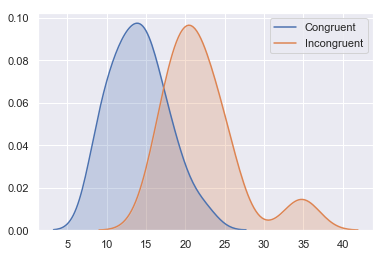

In [10]:
sns.kdeplot(df['Congruent'], shade=True)
sns.kdeplot(df['Incongruent'], shade=True)
plt.show()

**Answer**: By comparing the two distribution data on the same plot, it is seen that the congruent tests have faster time taken as compared ot the incongruent tests. Also, in the incongruent tests plot, it shows that there is a group of time taken that is slower than the rest of the results.

## 5. Now, perform the statistical test and report your results. 
What is your confidence level and your critical statistic value? 

Do you reject the null hypothesis or fail to reject it? 

Come to a conclusion in terms of the experiment task. 

Did the results match up with your expectations?


In [35]:
sample_no = len(df['Incongruent'])
crit_stat = stats.t.ppf(0.95, sample_no - 1)

print (f"Critical statistic value for 95% confidence level = {crit_stat:.3f}")

df['Difference'] = df['Congruent'] - df['Incongruent']
stddev = (np.std(df['Difference'], ddof = 1))

print(f"Standard Deviation = {stddev:.3f}")

pointest = np.mean(df['Congruent']) - np.mean(df['Incongruent'])

print(f"Point Estimate = {pointest:.3f}")

t_stat = abs(pointest)/(stddev/ np.sqrt(len(df['Congruent'])))

print(f't-statistic = {t_stat:.3f}')

Critical statistic value for 95% confidence level = 1.714
Standard Deviation = 4.865
Point Estimate = -7.965
t-statistic = 8.021


#### What is your confidence level and your critical statistic value? 

Critical statistic value for 95% confidence level =  1.72

#### Do you reject the null hypothesis or fail to reject it? 

We reject the __null hypothesis__ as there is significant difference between t-statistic and t-critical value.

#### Come to a conclusion in terms of the experiment task. 

A conclusion can be drawn that incongruent tasks will have a longer time taken to be completed as compared to a congruent task.

#### Did the results match up with your expectations?

My results matches with the expectations. 